<a href="https://colab.research.google.com/github/JGrant3101/ME4MachineLearning/blob/main/Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Start by importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
import pandas
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Setting the random seed to 0
np.random.seed(0)

Above we have imported all of the necessary libraries for the tutorial

Question 1

In [2]:
# Loading in the csv file
df = pandas.read_csv('http://pogo.software/me4ml/xray.csv')

# Setting up the x and y values
x = np.array(df['Distance (mm)'][:])
y = np.array(df['Total absorption'][:])

In the code above we have imported the data from a csv file and then assigned the relevant data to an x and a y array

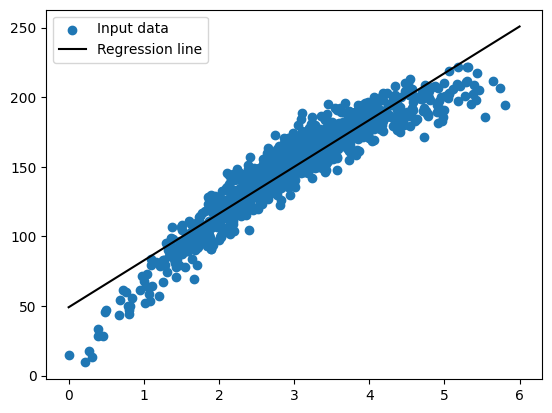

In [3]:
# Going to to do the linear regression using the matrix manipulation from the notes
# Start by creating an empty 2x2 matrix and 2x1 vector to populate
Matrix1 = np.zeros((2, 2))
Vector1 = np.zeros((2, 1))

# Setting each of the values in the matrix
Matrix1[0, 0] = np.sum(x)
Matrix1[1, 0] = len(x)
Matrix1[0, 1] = np.sum(x**2)
Matrix1[1, 1] = np.sum(x)

# Next will set each of the values in the vector
Vector1[0, 0] = np.dot(x, y)
Vector1[1, 0] = np.sum(y)

# Finding the solution
BetaVector1 = np.linalg.solve(Matrix1, Vector1)

# Now looking to plot the points and the linear regression line
# Start by generating an x array
xregres = np.linspace(0, 6, 200)
# Then generate the y array using the beta values found previously
yregresLin = BetaVector1[0, 0] + BetaVector1[1, 0] * xregres

# Now doing the actual plotting
fig1, ax1 = plt.subplots()
ax1.scatter(x, y, label = 'Input data')
plt.plot(xregres, yregresLin, color = 'black', label = 'Regression line')
plt.legend()

Above we have computed the beta values for a linear regression model fit to the data we imported and plotted both this model and the raw data together.

Question 2

Text(0.5, 100, 'Joe Grant')

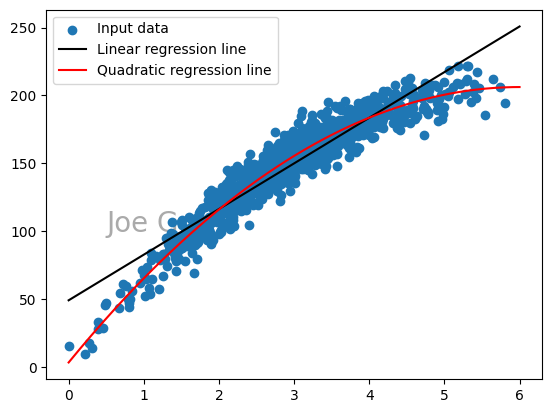

In [4]:
# Now fitting a quadratic curve to the data, this process is basically the same as for a linear fit but with an extra beta value and therefore an extra equation to solve
# Start by creating an empty 3x3 matrix and 3x1 vector to populate
Matrix2 = np.zeros((3, 3))
Vector2 = np.zeros((3, 1))

# Setting each of the values in the matrix
Matrix2[0, 0] = np.sum(x**2)
Matrix2[1, 0] = np.sum(x)
Matrix2[2, 0] = len(x)
Matrix2[0, 1] = np.sum(x**3)
Matrix2[1, 1] = np.sum(x**2)
Matrix2[2, 1] = np.sum(x)
Matrix2[0, 2] = np.sum(x**4)
Matrix2[1, 2] = np.sum(x**3)
Matrix2[2, 2] = np.sum(x**2)

# Next will set each of the values in the vector
Vector2[0, 0] = np.dot(x**2, y)
Vector2[1, 0] = np.dot(x, y)
Vector2[2, 0] = np.sum(y)

# Finding the solution
BetaVector2 = np.linalg.solve(Matrix2, Vector2)

# Then generate the y array using the beta values found previously
yregresQuad = BetaVector2[0, 0] + BetaVector2[1, 0] * xregres + BetaVector2[2, 0] * xregres**2

# Now doing plotting along with results from Q1
fig1, ax1 = plt.subplots()
ax1.scatter(x, y, label = 'Input data')
plt.plot(xregres, yregresLin, color = 'black', label = 'Linear regression line')
plt.plot(xregres, yregresQuad, color = 'red', label = 'Quadratic regression line')
plt.legend()
plt.text(0.5, 100, 'Joe Grant', size = 20, zorder = 0., color = '#aaaaaa')

Above we have fit a quadratic regression model to the data and then plotted the raw data and the two different models to be able to compare them.

Question 3

In [27]:
# Using scikit-learn to perform regression
# Reading in the CSV file
df3 = pandas.read_csv('http://pogo.software/me4ml/hdpeVel.csv')
# Set the index values as the one containing the temperature values
df3 = df3.set_index('T/C f/MHz')

# Extract the frequency values (and scale since they are MHz)
freq = df3.columns.values.astype(np.float) * 1e6
# Extract the temperature values
temp = df3.index.values.astype(np.float)
# Extract the main part - the velocity values
vel = df3.to_numpy()

# Calculate the total number of values
tot_values = len(freq) * len(temp)

# Forming the grids of x and y values
x1grid, x2grid = np.meshgrid(freq, temp)
Xgrid = np.concatenate([x1grid.reshape([tot_values, 1]), x2grid.reshape([tot_values, 1])], axis = 1)
ygrid = vel.reshape([tot_values, 1])

# Fitting a linear regression model to the data
reg = LinearRegression()
reg.fit(Xgrid, ygrid)

# Predicting y values based on this linear regression fit
y_lin = reg.predict(Xgrid)

# Plotting the data
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = Xgrid[:, 0], y = Xgrid[:,1], z = ygrid[:, 0], mode = 'markers', marker = dict(size = 2, color = '#000000', symbol = 'x')))
fig.add_trace(go.Scatter3d(x = Xgrid[:, 0], y = Xgrid[:,1], z = y_lin[:, 0], mode = 'markers', marker = dict(size = 3, color = '#ff0000', symbol = 'circle')))

# Using a 2 degree polynomial fit instead of linear
poly = sklearn.preprocessing.PolynomialFeatures(degree = 2)
# Generating the new feature vector
X_poly = poly.fit_transform(Xgrid)

#Performing the linear regression but on the polynomial Xgrid
reg_poly = LinearRegression()
reg_poly.fit(X_poly, ygrid)

# Predicting y values using X_poly as input and the new polynomial model fit
y_poly = reg_poly.predict(X_poly)
fig.add_trace(go.Scatter3d(x = Xgrid[:, 0], y = Xgrid[:,1], z = y_poly[:, 0], mode = 'markers', marker = dict(size = 3, color = '#00ff00', symbol = 'diamond')))

<ipython-input-27-aa22495f4d56>:8: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-27-aa22495f4d56>:10: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Above we have used the scikit learn toolbox to fit both a linear and polynomial model to the multi-dimensional data and plotted the results, seeing the polynomial results in a better fit.